In this project, we are looking at the impact of Covid-19 on job counts in the airline industry, specifically in Northern America, Central America and the Caribbean, and South America. 

We analyzed job inflow and outflow and counts from 2018-2020 in order to see whether there was a descent in employment.

In order to get a better understanding of the forces driving any changes in employment, we looked at the data at the company, job category, and gender level.

In [ ]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In the code below, we started to clean our dataset.

We created a new dataset with just the data from 2018 to 2020, specifically for American Airlines and Delta Airlines.

In [ ]:
# reading in the csv file
data = pd.read_csv('DB_MidtermSampleData_Mar21.csv')

# replacing empty with nan
nan_data = data.replace("empty", np.nan)
nan_data.head()

# changed all the months to datetime so it is easier to choose which years to look at
nan_data["month"] = pd.to_datetime(nan_data["month"])

# chose to only look at Delta and American Airline from 2018-2020
df = nan_data.loc[(nan_data["company"] == "American Airlines Group, Inc.") |
(nan_data["company"] == "Delta Air Lines, Inc."), :]

df = df.loc[(nan_data['month'].dt.year>=2018)&(nan_data["month"].dt.year<2021), :]

# if the job category was missing, we just labelled it other
df["job_category"] = df["job_category"].replace(np.nan, "other")

# create netflow column to find net job growth/loss
df["net_flow"] = df["inflow"] - df["outflow"]

# chronological order
df = df.sort_values("month")

In [ ]:
df["company"].value_counts()

American Airlines Group, Inc.    9864
Delta Air Lines, Inc.            9792
Name: company, dtype: int64

To find which regions we should look at, we grouped the data by regions and ordered them.

In [ ]:
df.groupby("region")["count"].sum().sort_values(ascending = False)

region
Northern America                     8.986528e+06
Central America and the Caribbean    1.040454e+05
South America                        9.869504e+04
Northern Europe                      4.705235e+04
Southern Asia                        3.916567e+04
Western Europe                       3.444254e+04
Eastern Asia                         3.333029e+04
Sub-Saharan Africa                   2.769623e+04
South-Eastern Asia                   2.768085e+04
Southern Europe                      2.757632e+04
Northern Africa                      1.435653e+04
Central and Western Asia             1.289484e+04
Arab States                          1.005750e+04
Eastern Europe                       8.876209e+03
Pacific Islands                      8.665838e+03
Name: count, dtype: float64

From the region breakdown above, we decided to examine the top 3 regions: Northern America, Central America and the Caribbean, and South America.

In [ ]:
df = df.loc[(df["region"] == "Northern America")|
(df["region"] == "Central America and the Caribbean")|
(df["region"] == "South America"),:]

We filtered the data based on region and company to understand the effects of COVID-19 on the three regions and the airline industry.

In [ ]:
# datasets with each region
North = df.loc[df['region']=='Northern America',:]
South = df.loc[df['region']=='South America',:]
Central = df.loc[df['region']=='Central America and the Caribbean',:]

# datasets for each airline
american = df.loc[df['company']=='American Airlines Group, Inc.',:]
delta = df.loc[df['company']=='Delta Air Lines, Inc.',:]

For visual consistency, we preset the colors for easy access.

In [ ]:
#color schemes
cmap = plt.get_cmap('Spectral')

#colors for job categories in pie charts
colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#colors for gender - index 0 female, index 1 male
colors_gen = [colors[3],colors[8]]

#colors for region - index 0 North America, index 1 South America, index 2 Central America
colors_reg = [colors[1], colors[3], colors[8]]

#colors for companies - index 0 American Airlines, index 1 Delta, index 2 total industry
colors_comp = [colors[8],colors[1], 'dimgrey']

#colors for job categories in line graphs, sorted alphabetically
colors_job = ['maroon','crimson', 'darkorange', 'goldenrod', 'darkseagreen', 'forestgreen', 'royalblue', 'mediumpurple', 'palevioletred']

# Impact on Net Flow

First, we created a graph that looks at the general net flow of American and Delta airline jobs from January 2018 onward to see the extent of how COVID-19 impacted these jobs specifically in North, South, and Central America and the Caribbean.

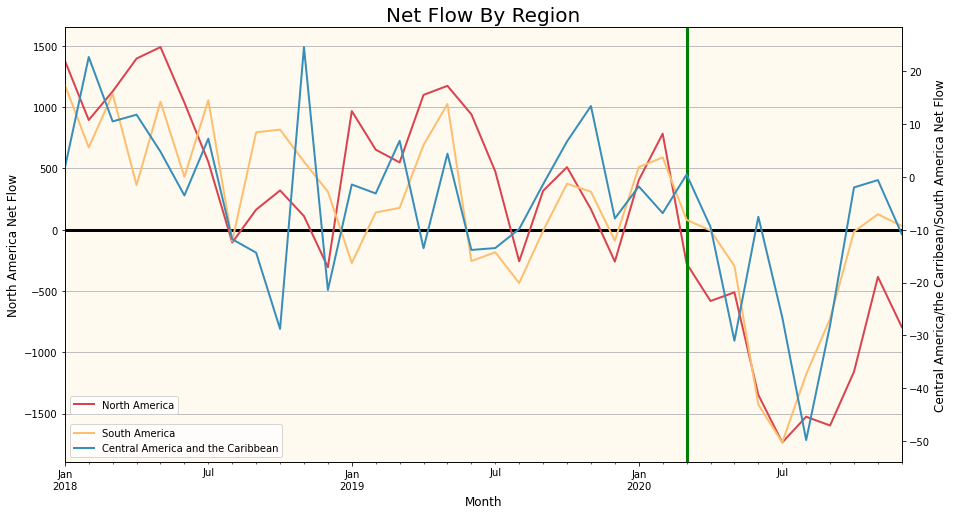

In [ ]:
#group data by region and get the sum of net_flow
N = North.groupby('month').agg({'net_flow':'sum'})
S = South.groupby('month').agg({'net_flow':'sum'})
C = Central.groupby('month').agg({'net_flow':'sum'})

fig,ax = plt.subplots(figsize=(15,8))
N.plot.line(ax=ax, color=colors_reg[0], linewidth=2)

ax2 = ax.twinx()

#plot
S.plot.line(ax=ax2, color=colors_reg[1], linewidth=2)
C.plot.line(ax=ax2,color=colors_reg[2], linewidth=2)

#set title
ax.set_title('Net Flow By Region', size=20)

#set legend position for better visuals
ax.legend(['North America'], bbox_to_anchor=(0,.1), loc='lower left')
ax2.legend(['South America','Central America and the Caribbean'], loc='lower left')

#set labels and background color
ax.set_xlabel('Month',size=12)
ax.set_ylabel('North America Net Flow',size=12)
ax2.set_ylabel("Central America/the Carribean/South America Net Flow",size=12)
ax.set_facecolor('floralwhite')

#set gridlines to show 0 on y-axis and March on x-axis
ax.yaxis.grid()
a = ax.get_ygridlines()
b = a[4]
b.set_color('black')
b.set_linewidth(3)
ax.set_facecolor('floralwhite')
ax.axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)

As we can see, Net flow of jobs seemed relatively normal up until March of 2020 when COVID caused the Americas to shut down flights, after which the Net Flow consistently remained negative. This led to a huge decrease in job counts.  

The following graph will show the inflow, outflow, and count seperately to show their individual changes due to COVID.

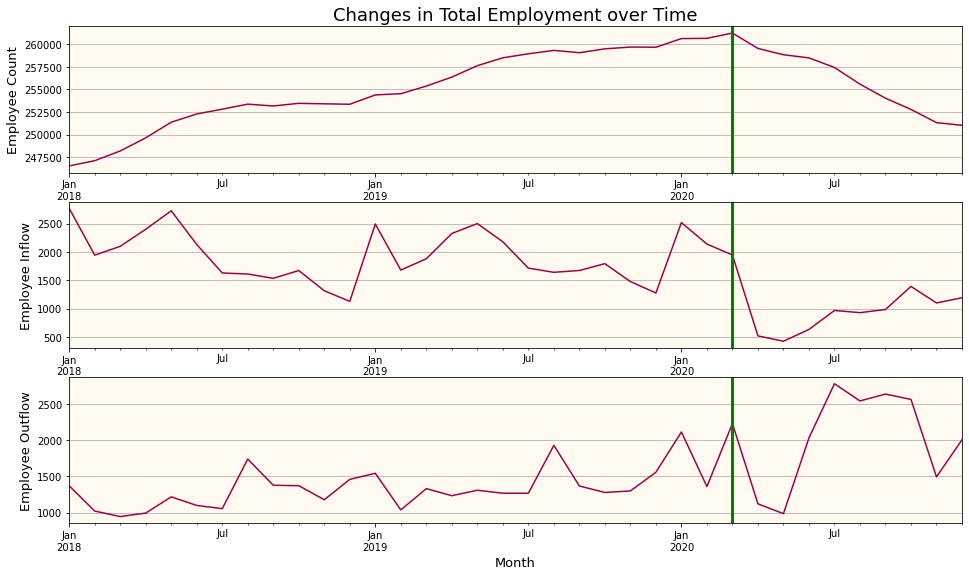

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(16,4))

df_by_month = df.groupby('month').sum()

#plotting count
df_by_month['count'].plot(ax=ax[0], color=colors[0])
#plotting inflow
df_by_month['inflow'].plot(ax=ax[1], color = colors[0])
#plotting outflow
df_by_month['outflow'].plot(ax=ax[2], color = colors[0])

#set title
ax[0].set_title("Changes in Total Employment over Time", size=18)

#set y axis labels
ax[0].set_ylabel("Employee Count", size=13)
ax[1].set_ylabel("Employee Inflow", size=13)
ax[2].set_ylabel("Employee Outflow", size=13)

#adding vertical lines to indicate start of COVID-19
ax[0].axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)
ax[1].axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)
ax[2].axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)

#changing face color of graph
ax[0].set_facecolor('floralwhite')
ax[1].set_facecolor('floralwhite')
ax[2].set_facecolor('floralwhite')

#adding a grid on y axis
ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[2].grid(axis='y')

#changing x axis label
ax[2].set_xlabel('Month', size=13)

#changing spacing to see the x- tick labels properly
fig.subplots_adjust(top=1.85)

Above, we see  that the initial decline in employment following the pandemic was largely driven by a large decrease in hiring (inflow), as employee retention would have increased from the initial decrease in outflow.

Then, moving towards the summer months, we see a historically large outflow of employees that outpaces the slight increase in hiring that occurs at this time, driving total employment further down. 

In October, outflows decrease for 2 months, before increasing again in December. Again, however, the outflow remains greater than the inflow, so employment continues to fall, albeit at a slightly slower rate.




# Impact on Industry

The code below calculates the monthly job growth rate. The growth rate makes it easier to compare between companies that have different total number of employees and show changes in total number of employees.

In [ ]:
#generating monthly growth data in percentage (%)
american_growth = american.groupby('month', as_index=True).agg({'count':'sum'})
american_growth['growth'] = american_growth.pct_change() * 100

delta_growth = delta.groupby('month', as_index=True).agg({'count':'sum'})
delta_growth['growth'] = delta_growth.pct_change() * 100

df_growth = df.groupby('month', as_index=True).agg({'count':'sum'})
df_growth['growth'] = df_growth.pct_change() * 100

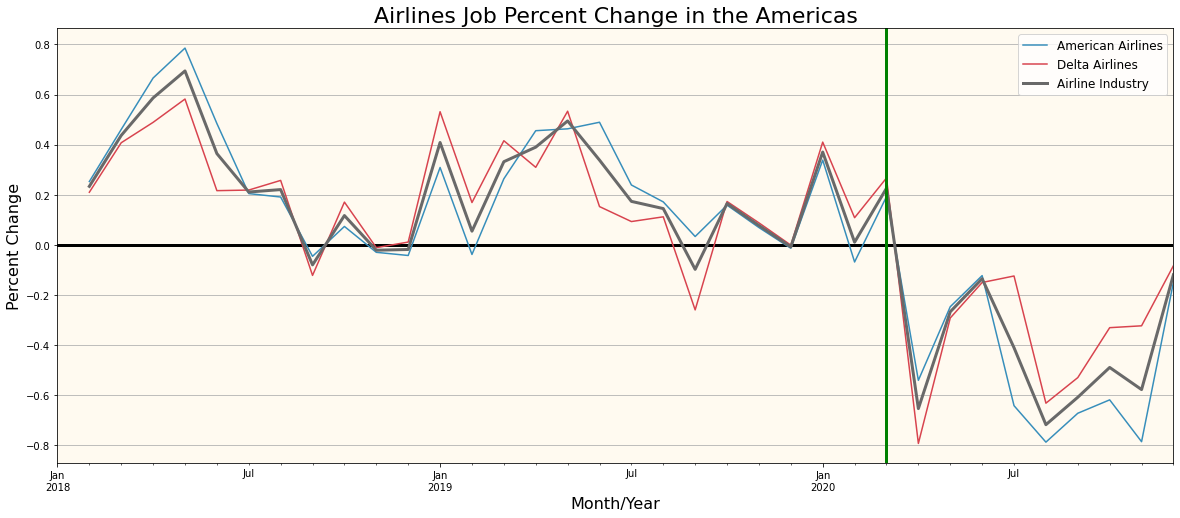

In [ ]:
#ploting the airlines
fig,ax = plt.subplots()
american_growth['growth'].plot.line(ax=ax, figsize=(20,8), color=colors_comp[0], linewidth=1.5)
delta_growth['growth'].plot.line(ax=ax, figsize=(20,8), color=colors_comp[1], linewidth=1.5)
df_growth['growth'].plot.line(ax=ax, figsize=(20,8), color=colors_comp[2], linewidth=3)

#setting the titles and labels
ax.set_title('Airlines Job Percent Change in the Americas', size=22)
ax.set_ylabel('Percent Change', size=16)
ax.set_xlabel('Month/Year', size=16)
ax.legend(['American Airlines', 'Delta Airlines', 'Airline Industry'], loc='upper right', fontsize='large')

#set gridlines to show 0 on y-axis and March on x-axis
ax.yaxis.grid()
a = ax.get_ygridlines()
b = a[5]
b.set_color('black')
b.set_linewidth(3)
ax.set_facecolor('floralwhite')
ax.axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)


The graph shows the job percent change for American Airlines and Delta Airlines in the Americas.
Based on the graph, between 2018 and 2020, the airline industry had a relatively positive job growth every month. 
But once the WHO declared COVID-19 a pandemic and the United States announced a national lockdown in March, airline job growth begins to be negative. 
Both American Airlines and Delta Airlines suffered from the lockdowns. 
The job growth continues to be below the black line for both Delta and American Airlines even until the end of 2020, but there are signs that the job growth will improve in 2021 since the growth is getting closer to zero.

# Effect on Job Categories

We want to examine the growth/ decline of each job category in the airline industry so we can see which job was impacted most.

In [ ]:
# set the "other" job category graph is last so that the "other" graph is last

jobs_ = [i for i in list(df["job_category"].unique()) if i != "other"]
jobs_.append("other")

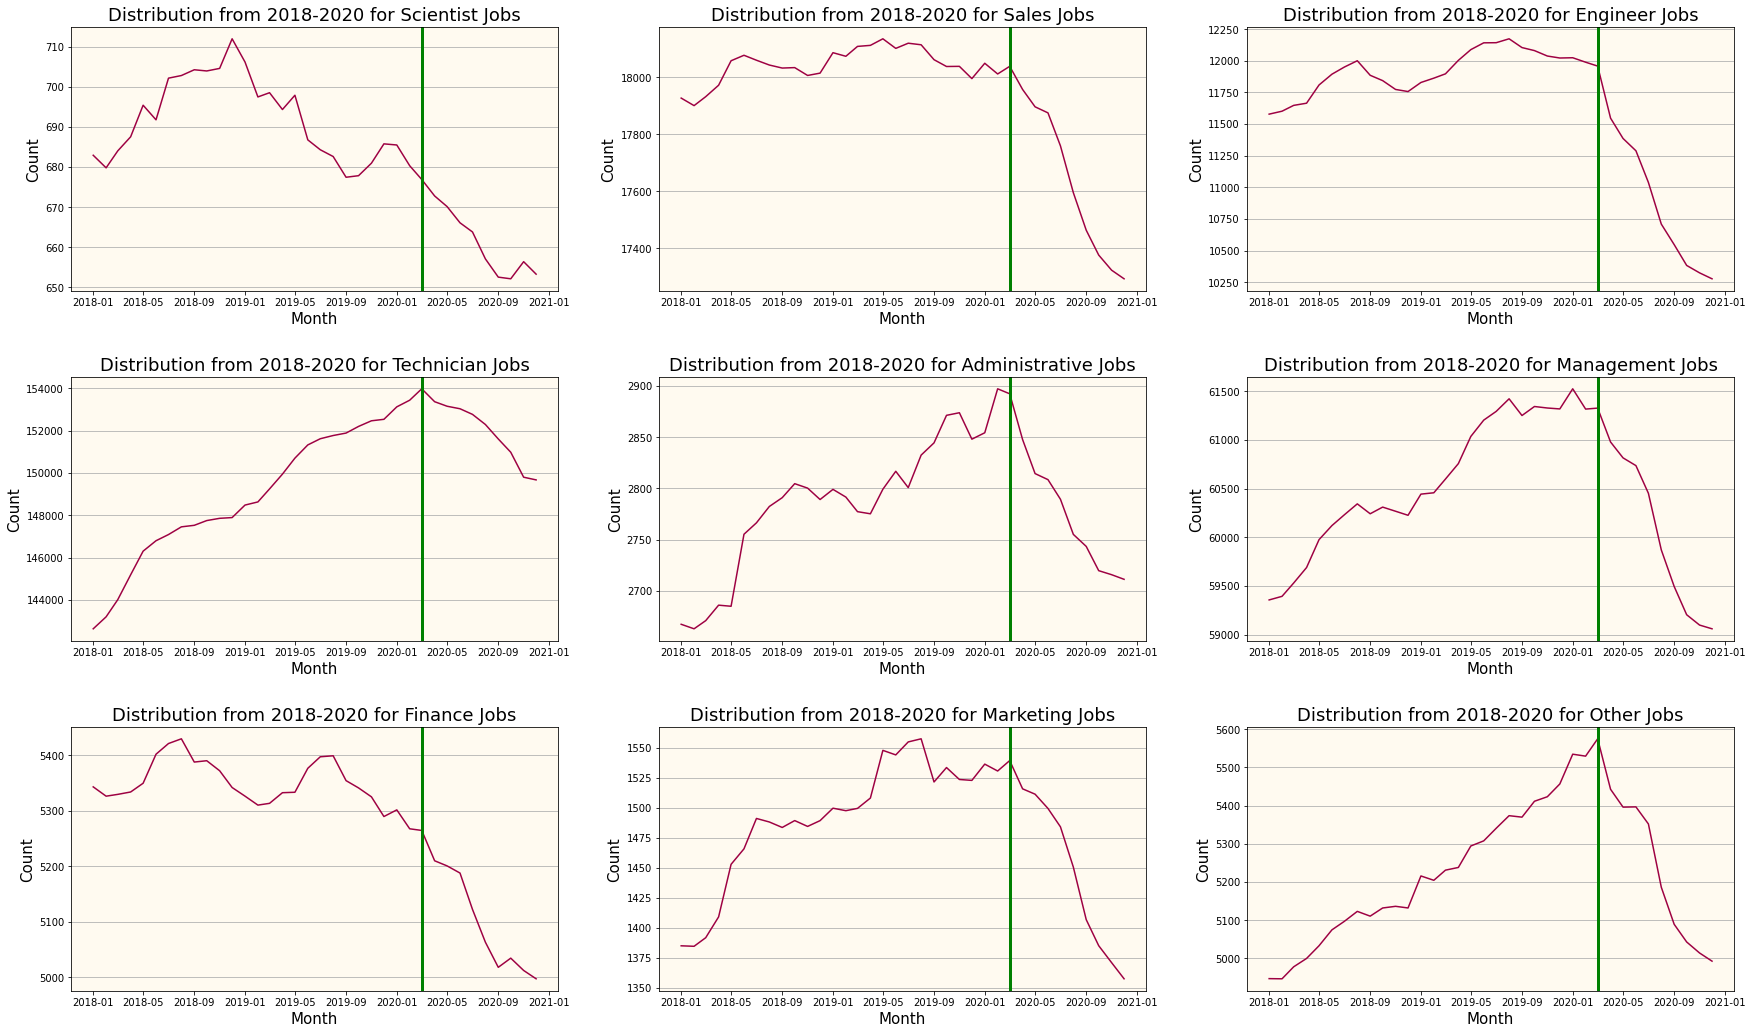

In [ ]:
# list of jobs to loop through
jobs = [i for i in list(df["job_category"].unique())]
jobs.sort()

# creating subplots to plot each job's graph
fig, ax = plt.subplots(3,3, figsize = (25,15))
ls = [0, 1, 2, 0, 1, 2, 0, 1, 2] # the column number of the graph
ls_row = [0, 0, 0, 1, 1, 1, 2, 2, 2] # the row number of the graph

counter = 0
counter_row = 0

# graphing each job's trend individually
for i in jobs_:
    # each job category graph grouped by month
    temp = df[df["job_category"] == i]
    graph = temp.groupby("month")["count"].sum()
    ax[ls[counter], ls_row[counter_row]].plot(graph, color=colors[0])
    ax[ls[counter], ls_row[counter_row]].set_title("Distribution from 2018-2020 for " + i.title() + " Jobs", size = 18)
    ax[ls[counter], ls_row[counter_row]].set_ylabel("Count", size = 15)
    ax[ls[counter], ls_row[counter_row]].set_xlabel("Month", size = 15)

    # plotting a vertical line that represents when the lockdown started
    ax[ls[counter], ls_row[counter_row]].axvline(x = dt.datetime(2020, 3, 1), color='g', linestyle='-', linewidth = 3)
    ax[ls[counter], ls_row[counter_row]].set_facecolor('floralwhite')
    ax[ls[counter], ls_row[counter_row]].grid(axis='y')

    counter += 1
    counter_row += 1

fig.tight_layout(pad = 3)


We can see that after the green line representing when lockdown began, there is a sharp decline in job counts in all job categories, which heavily indicates that covid had an effect on job count. So now we can see each impact with respect to each other.

Text(0.5, 1.0, 'Distribution of Job Counts from 2018-2020')

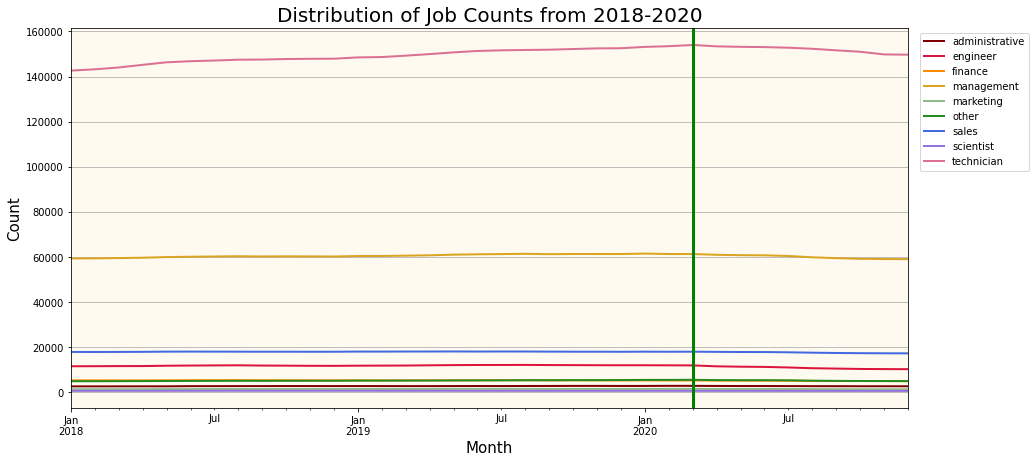

In [ ]:
# seeing their relation with each other
k=0

fig, ax = plt.subplots()
# for each job in the category
for i in jobs:
    temp = df[df["job_category"] == i]
    temp.groupby("month")["count"].sum().plot.line(figsize = (15,7), color = colors_job[k], linewidth=2)
    k+=1

ax.axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)
ax.legend(labels = jobs, bbox_to_anchor=(1.15,1))
ax.set_facecolor('floralwhite')
ax.grid(axis='y')
ax.set_xlabel("Month", size=15)
ax.set_ylabel("Count", size=15)
ax.set_title("Distribution of Job Counts from 2018-2020", size = 20)


After the vertical line, although trend of all the lines seem to dip a little, the distributions still look uniform, which may suggest there wasn't an impact. However, we know this isn't true because of the previous graphs above. Because of the different amounts of data there is for each category, we need to look at this data with a different metric that can represent the relationship between lockdown and job counts more accurately. So, in order to look more closely at the how much the count changed, we decided that rate of change would be a better way to analyze the impact of covid on these jobs.


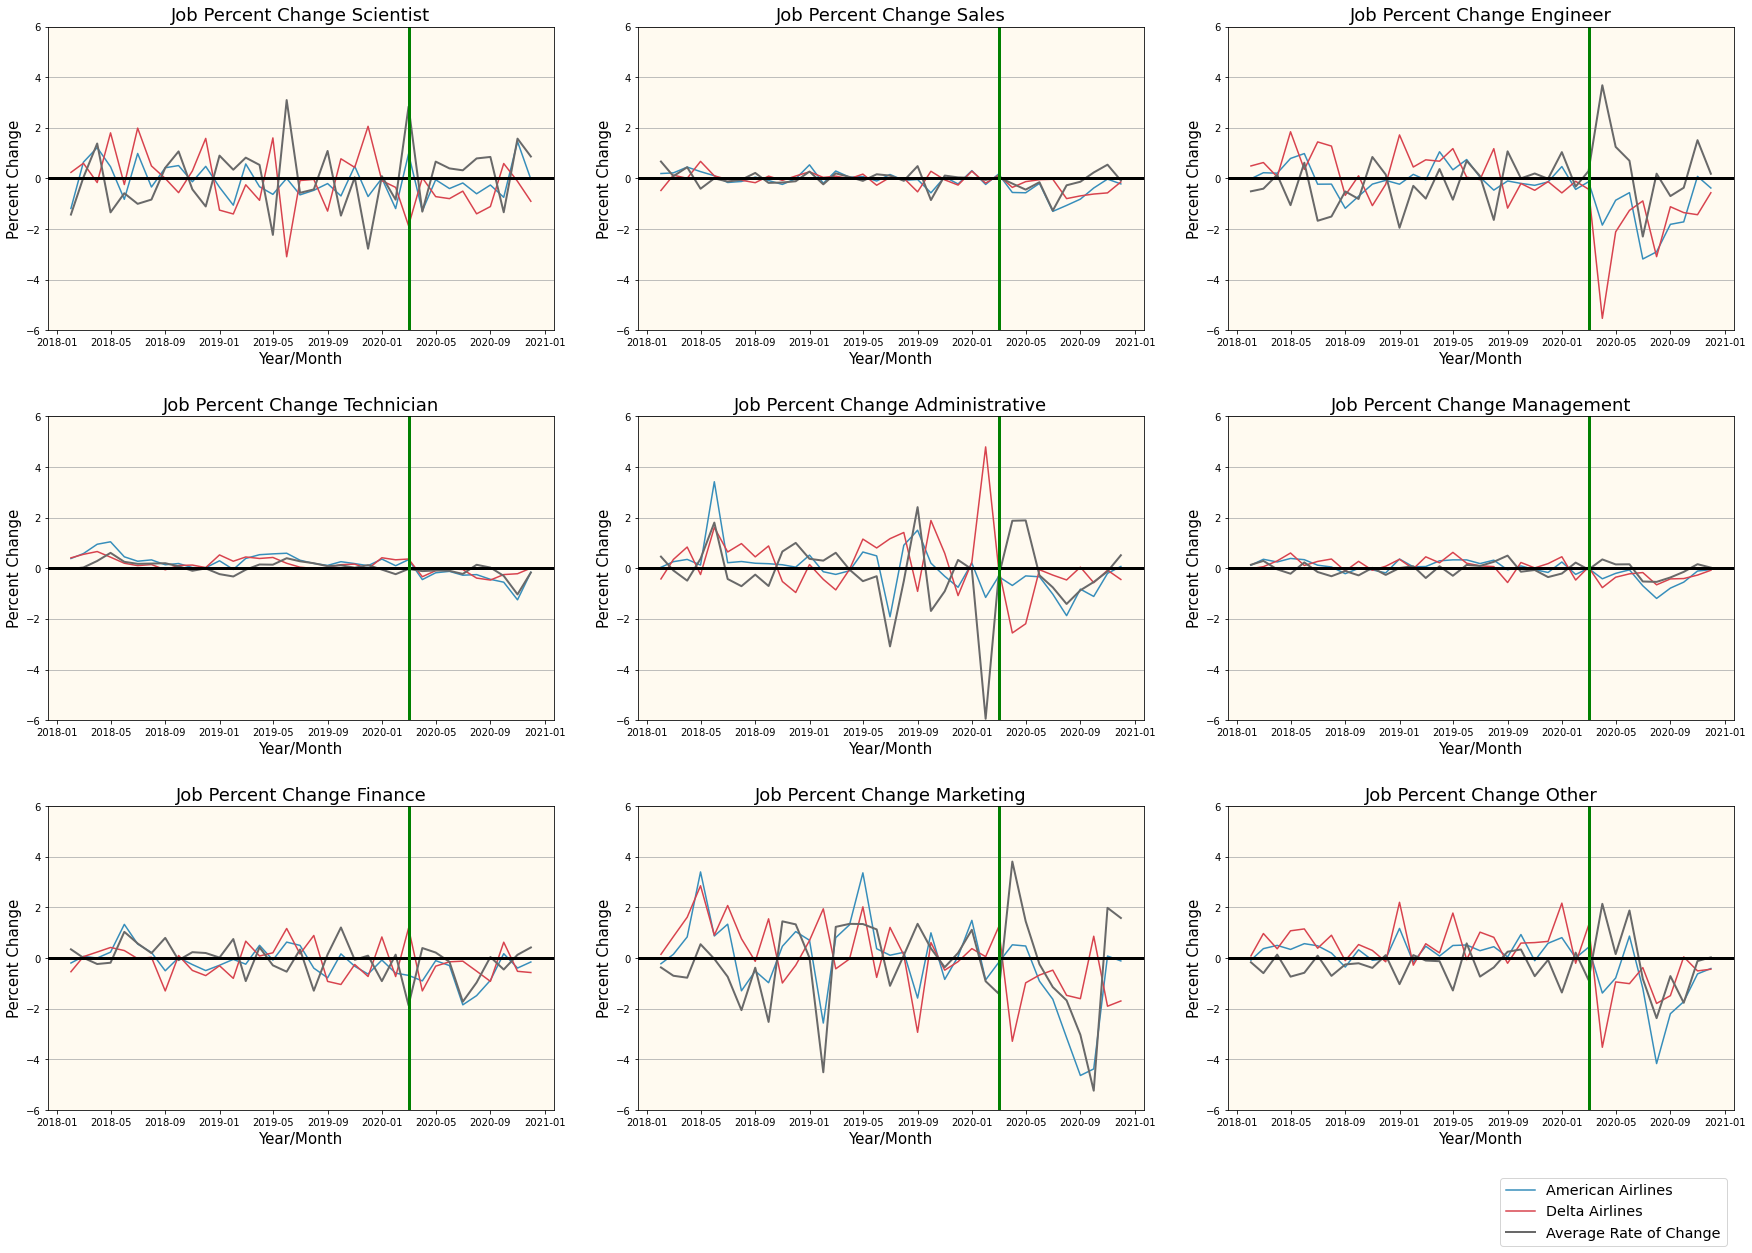

In [ ]:
#percent change for job categories

fig, ax = plt.subplots(3,3, figsize = (25,18))
ls = [0, 1, 2, 0, 1, 2, 0, 1, 2]
ls_row = [0, 0, 0, 1, 1, 1, 2, 2, 2]

counter = 0
counter_row = 0

for i in jobs_:
    # resetting the dataset to include all jobs
    american = df.loc[df['company']=='American Airlines Group, Inc.',:]
    delta = df.loc[df['company']=='Delta Air Lines, Inc.',:]

    # slicing dataset for each specific job
    american = american.loc[american["job_category"] == i, :]
    delta = delta.loc[delta["job_category"] == i, :]

    american_change = pd.DataFrame(american.groupby("month", as_index=True)["count"].sum())
    american_change["percent_change"] = american_change.pct_change() *100

    delta_change = pd.DataFrame(delta.groupby("month", as_index = True)["count"].sum())
    american_change["percent"] = delta_change.pct_change() *100

    # creating a column for average rate of change
    american_change["average_change"] = american_change["percent_change"] - american_change["percent"]

    # plotting percent change of American and Delta Airlines as well as their average
    ax[ls[counter], ls_row[counter_row]].plot(american_change["percent_change"], color=colors_comp[0])
    ax[ls[counter], ls_row[counter_row]].plot(american_change["percent"], color=colors_comp[1])
    ax[ls[counter], ls_row[counter_row]].plot(american_change["average_change"], color = "dimgrey", linewidth = 2)
    ax[ls[counter], ls_row[counter_row]].set_title("Job Percent Change " + i.title(), size = 18)
    ax[ls[counter], ls_row[counter_row]].set_xlabel("Year/Month", size = 15)
    ax[ls[counter], ls_row[counter_row]].set_ylabel('Percent Change', size = 15)
    plt.legend(["American Airlines", "Delta Airlines", "Average Rate of Change"], bbox_to_anchor = (1, -.2), fontsize='x-large')
    
    # creating a vertical line at 0 and a horizontal line indicating beginning of lockdown
    ax[ls[counter], ls_row[counter_row]].axhline(y=0, color='black', linestyle='-', linewidth = 3)
    ax[ls[counter], ls_row[counter_row]].axvline(x = dt.datetime(2020, 3, 1), color='g', linestyle='-', linewidth = 3)
    ax[ls[counter], ls_row[counter_row]].set_facecolor('floralwhite')

    ax[ls[counter], ls_row[counter_row]].set_ylim(-6, 6)
    ax[ls[counter], ls_row[counter_row]].grid(axis='y')
    counter += 1
    counter_row += 1

# spacing between graphs 
fig.tight_layout(pad = 3)

From the above graphs, we can see that while the job categories management, technician, sales weren't as heavily impacted by covid, engineer, marketing, administrative, and other job counts sharply decreased. This can show which jobs were necessary and more in demand after the lockdown began.

This data makes sense after taking into consideration the decline in traveling, which would obviously cause a decrease in some of these job markets, such as marketing.

## Changes in Jobs by Gender

Here, we examined the impact of COVID on the distribution of jobs given to men versus women.

In [ ]:
# create copy of df that can be modified
df_ = df.drop(['sector'], axis=1)

In [ ]:
#create a new, gendered dataframe using pd.merge

male_df = df_.loc[df['gender']=='male'].drop(['gender'], axis=1)
male_df = male_df.rename(columns={'count':'male_count', 'inflow':'male_inflow', 'outflow':'male_outflow', 'net_flow':'male_net_flow'})

female_df = df_.loc[df['gender']=='female'].drop(['gender'], axis=1)
female_df = female_df.rename(columns={'count':'female_count', 'inflow':'female_inflow', 'outflow':'female_outflow', 'net_flow':'female_net_flow'})

gendered_df = pd.merge(male_df, female_df, left_on=['company','month','job_category'], right_on=['company','month','job_category'])

#create new columns for the new dataframe to better analyze
gendered_df['total_count'] = gendered_df['male_count'] + gendered_df['female_count']

gendered_df['total_inflow'] = gendered_df['male_inflow'] + gendered_df['female_inflow']

gendered_df['total_outflow'] = gendered_df['male_outflow'] + gendered_df['female_outflow']

gendered_df['total_net_flow'] = gendered_df['male_net_flow'] + gendered_df['female_net_flow']

gendered_df['female_count_share'] = gendered_df['female_count']/gendered_df['total_count']
gendered_df['male_count_share'] = gendered_df['male_count']/gendered_df['total_count']

gendered_df['female_inflow_share'] = gendered_df['female_inflow']/gendered_df['total_inflow']
gendered_df['male_inflow_share'] = gendered_df['male_inflow']/gendered_df['total_inflow']

gendered_df['male_outflow_share'] = gendered_df['male_outflow']/gendered_df['total_outflow']
gendered_df['female_outflow_share'] = gendered_df['female_outflow']/gendered_df['total_outflow']

gendered_df['male_net_flow_share'] = gendered_df['male_net_flow']/gendered_df['total_net_flow']
gendered_df['female_net_flow_share'] = gendered_df['female_net_flow']/gendered_df['total_net_flow']

gendered_df = gendered_df[['company','month','job_category','male_count','female_count','total_count','male_count_share', 'female_count_share','male_inflow','female_inflow','total_inflow','female_inflow_share','male_inflow_share','male_outflow','female_outflow','total_outflow','male_outflow_share','female_outflow_share','male_net_flow','female_net_flow','total_net_flow','male_net_flow_share','female_net_flow_share']]

First, we wanted to see male and female job counts in relation to each other.

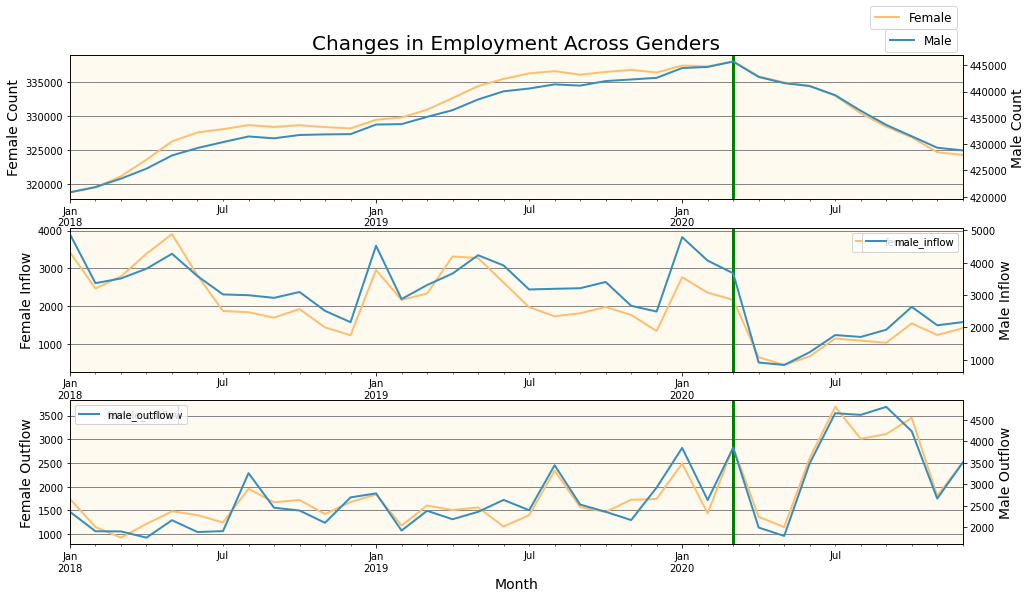

In [ ]:
# looking at male and female employment change

# create figure and axis objects with subplots()
fig,ax = plt.subplots(nrows=3,figsize=(16,9))

# make a plot
gendered_df.groupby('month').sum().plot(ax=ax[0], y='female_count', color=colors_gen[0], linewidth=2)

# set y-axis label
ax[0].set_ylabel("Female Count",fontsize=14)

gendered_df.groupby('month').sum().plot(ax=ax[1], y='female_inflow', color=colors_gen[0], linewidth=2)
# set y-axis label
ax[1].set_ylabel("Female Inflow",fontsize=14)

gendered_df.groupby('month').sum().plot(ax=ax[2], y='female_outflow', color=colors_gen[0], linewidth=2)
# set y-axis label
ax[2].set_ylabel("Female Outflow",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=[ax[0].twinx(),ax[1].twinx(),ax[2].twinx()]

# make new plots with different y-axis by creating a second axis object
gendered_df.groupby('month').sum().plot(ax=ax2[0], y='male_count', color=colors_gen[1], linewidth=2)
ax2[0].set_ylabel("Male Count",fontsize=14)
ax[0].set_facecolor('floralwhite')
ax[0].grid(axis='y', color='dimgrey')

gendered_df.groupby('month').sum().plot(ax=ax2[1], y='male_inflow', color=colors_gen[1], linewidth=2)
ax2[1].set_ylabel("Male Inflow",fontsize=14)
ax[1].set_facecolor('floralwhite')
ax[1].grid(axis='y', color='dimgrey')

gendered_df.groupby('month').sum().plot(ax=ax2[2], y='male_outflow', color=colors_gen[1], linewidth=2)
ax2[2].set_ylabel("Male Outflow",fontsize=14)
ax[2].set_facecolor('floralwhite')
ax[2].grid(axis='y', color='dimgrey')
ax[2].set_xlabel("Month",fontsize=14)


#create a line to represent start of COVID-19
ax[2].axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)

#repeat across axes
ax[1].axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)
ax[0].axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)

#make a legend
ax[0].legend(labels = ['Female'],bbox_to_anchor=[1, 1.38], fontsize='large')
ax2[0].legend(labels = ['Male'],bbox_to_anchor=[1, 1.22], fontsize='large')

#set title for graph
ax[0].set_title("Changes in Employment Across Genders", size=20)

plt.show()



We clearly see that changes in male and female counts, inflow, and outflow are highly correlated. That is, when male inflow or outflow increases, female inflow or outflow has a strong tendency to increase with it. The only exception in 2020 appears to be in August and September, where the number of men leaving their jobs increased while female retention increased.
<br>
Therefore, we expect to see little changes in the overall gender employment ratios across the industry before and after COVID-19.

In the code below, we looked at the job category distribution for men and women and which jobs they're more likely to have from 2018 to 2020.

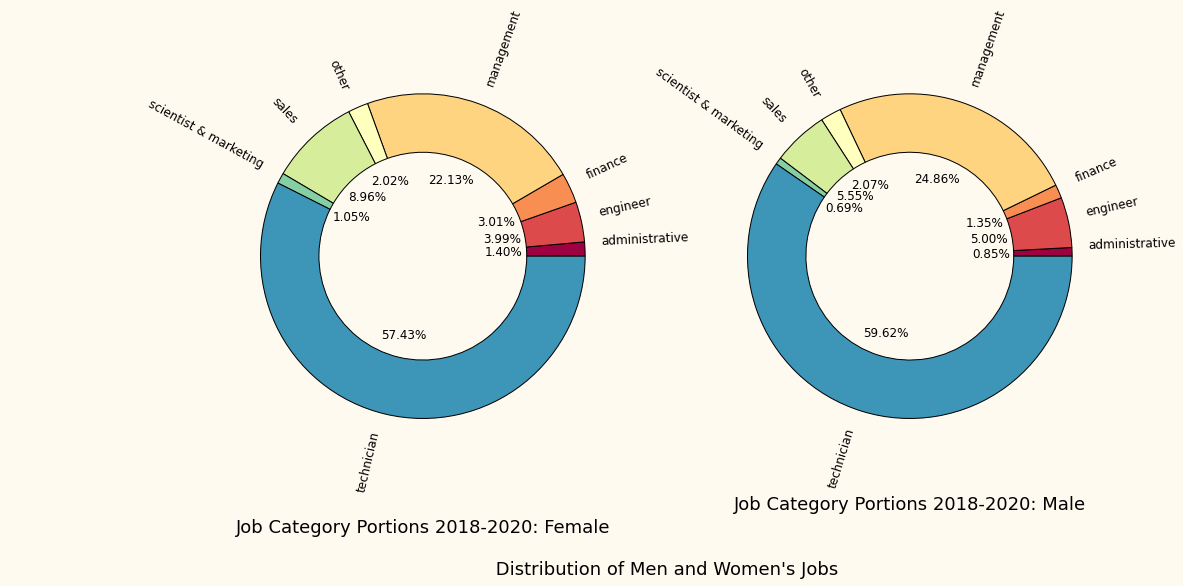

In [ ]:
#create a new set of colors
cmap = plt.get_cmap('Spectral')
colors2 = [cmap(i) for i in np.linspace(0, 1, 9)]

#aggregate the data by job category
job_cats = gendered_df.groupby('job_category').sum()

# combine the employees for scientist and marketing due to low number for better visiualization

job_cats.loc['scientist & marketing',:] = job_cats.loc['marketing',:]+job_cats.loc['scientist',:]
job_cats = job_cats.drop(['marketing','scientist'], axis=0).sort_index()

#create a figure with 2 columns
fig, ax = plt.subplots(ncols=2, figsize=(16,30))

#create a pie chart of the distibution of jobs held by males and females
#autopct - add percentage labels to each slice
#wedgeprops - used to customize the appearance of each wedge. Note that the wedgesize is reduced to create a "donut" shape for easier visualization
#rotatelabels - ensure that wedge labels are perpendicular to the wedge they represent
job_cats['female_count'].plot.pie(ax=ax[0], autopct='%.2f%%', wedgeprops = {'linewidth': 1, 'edgecolor':'black', 'width':.36}, rotatelabels=True, textprops={'fontsize':'large'}, pctdistance=.5, colors=colors2)

job_cats['male_count'].plot.pie(ax=ax[1], autopct='%.2f%%', wedgeprops = {'linewidth': 1, 'edgecolor':'black', 'width':.36}, rotatelabels=True, textprops={'fontsize':'large'}, pctdistance=.5, colors=colors2)

# create labels and titles for each axis
ax[1].set_title("Job Category Portions 2018-2020: Male", y=-.14, fontsize=18)
ax[1].set_ylabel(None)
ax[0].set_title("Job Category Portions 2018-2020: Female\n\n                                                                                     Distribution of Men and Women's Jobs", y=-.3, fontsize=18)
ax[0].set_ylabel(None)

# change the background color of the figure
fig.patch.set_facecolor('floralwhite')


Above, we see that any given woman is more likely to work in finance, administrative, and sales positions in the airline industry than any given man. On the other hand, any given man is more likely to have technician, management, or engineer positions than any given woman, from 2018-2020.

Then, we looked at the job counts of men and women in each job category.

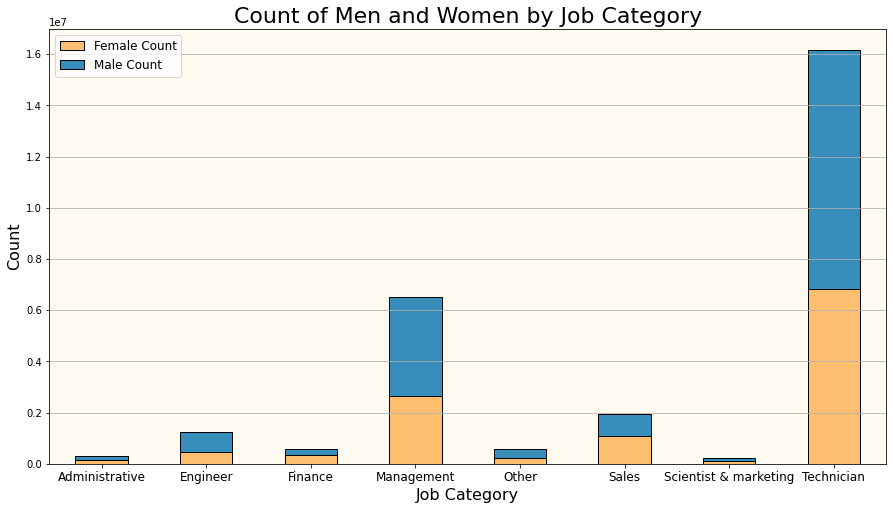

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

# plot the total count of men and women by their employment levels in each job category
job_cats[['female_count','male_count']].plot.bar(ax=ax,stacked=True, color=[colors[3],colors[8]], edgecolor='black')

#change background color
ax.set_facecolor('floralwhite')

#change title
ax.set_title("Count of Men and Women by Job Category", size=22)

#clean up legend to be capitalized and outside of graph
ax.legend(labels = ['Female Count', 'Male Count'],fontsize='large', loc='upper left')

#set x label and rotate for better visual
ax.set_xlabel("Job Category", size=16)
ax.tick_params(axis='x', rotation=0) 

#create an object of the labels needed for the bar plot's x ticks, and ensure they are capitalized
cat_labels = job_cats.index.str.capitalize()
ax.set_xticklabels(cat_labels,size=12)

#set y label
ax.set_ylabel('Count',size=16)

#place grid on y axis
ax.grid(axis='y')


Above, we see that the two largest job categories in the industry are Technician and Management positions. Here, we see that men dominate these positions, as well as engineering, while women dominate sales and finance positions in the industry.
<br>
We will looks at how jobs that are dominated by men and women, respectively, were affected by COVID-19 below

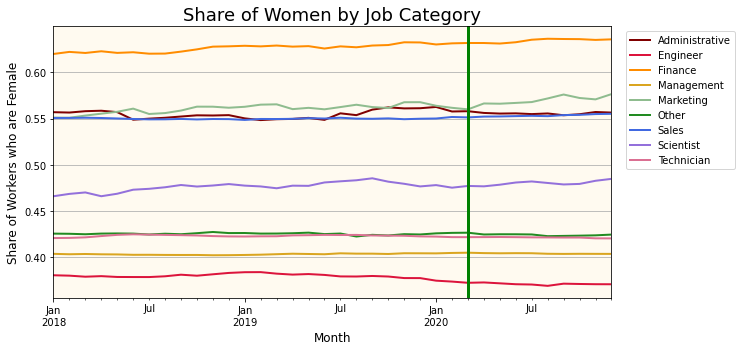

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

#aggregate the gendered dataframe by month and job category
cat_df = gendered_df.groupby(['month','job_category']).sum()

#create a new column to represent the share of female employees for each row
cat_df = cat_df['female_count']/cat_df['total_count']

#reset the index to avoid a multi-index table
cat_df = cat_df.reset_index()

#rename the first column for easier locating
cat_df = cat_df.rename({0:'female_share'}, axis=1)

#create a counter to loop through the colors at each iteration
k=0
for i in cat_df['job_category'].unique():
    cat_df.loc[cat_df['job_category']==i,:].plot(ax=ax, x='month', y='female_share', color=colors_job[k], linewidth=2)
    k+=1
        
ax.legend(cat_df['job_category'].unique())
ax.set_title("Share of Women by Job Category", size=18)
ax.set_xlabel('Month', size=12)
ax.set_ylabel("Share of Workers who are Female", size=12)

ax.grid(axis='y')
ax.set_facecolor('floralwhite')
cat_labels = cat_df['job_category'].value_counts().sort_index().index.str.capitalize()
ax.legend(labels = cat_labels.unique(), bbox_to_anchor=[1.23,1])

#set a vertical line to represent COVID-19's start
ax.axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)

Shown above is the share of people working in any given job category who are women. It appears that, for most of the job categories, there was no noticable deviation from previous trends after COVID-19 became a prominent issue. It does, however, appear that for finance and scientist jobs, fluctuations in the share of women remain similar.

However, the scale of the above makes it difficult to see if any trends emerge. Since there is a clear gap between which positions are male- or female-dominated, we will separate and aggregate these positions to get a better look at them.

['engineer', 'management', 'other', 'scientist', 'technician']
['administrative', 'finance', 'marketing', 'sales']


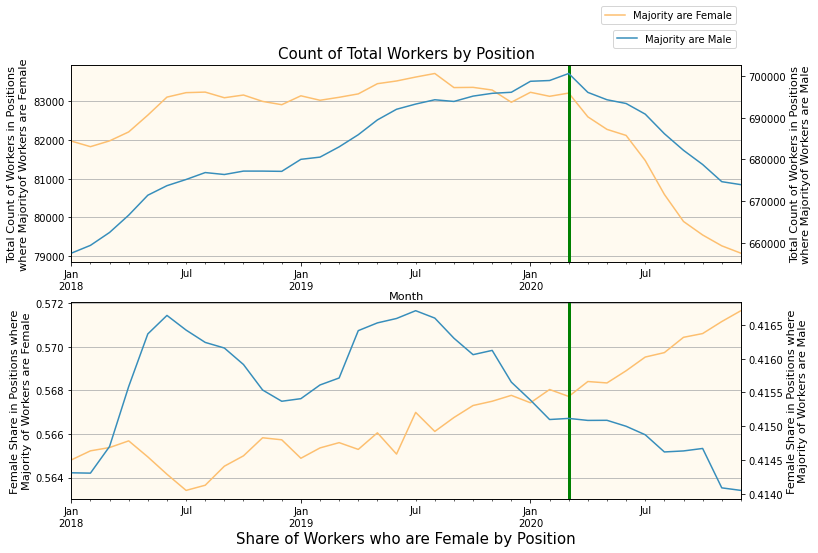

In [ ]:
# lets see if a pattern emerges between jobs where women were a minority vs a majority
fig, ax = plt.subplots(figsize=(12,8), nrows=2)

#initialize empty arrays to hold the job positions that have male or female majority
cat_df_minority = []
cat_df_majority = []

#locate the job categories that have a male majority or a female majority 
# by filtering on their share of female employees
# then, add them to an array that will hold their labels
for i in cat_df.groupby('job_category').mean().index:
    if cat_df.groupby('job_category').mean().loc[i,'female_share']>.5:
        cat_df_majority.append(i)
    else:
        cat_df_minority.append(i)

print(cat_df_minority)
print(cat_df_majority)

# from the above labels, create new dataframes to hold the total data by filtering the gendered dataframe, and aggregating by month

majority_women = gendered_df.loc[gendered_df['job_category'].isin(cat_df_majority),:].groupby('month').sum()
minority_women = gendered_df.loc[gendered_df['job_category'].isin(cat_df_minority),:].groupby('month').sum()

#recreate a row to represent the share of female employees in each month
majority_women['female_share'] = majority_women['female_count']/majority_women['total_count']
minority_women['female_share'] = minority_women['female_count']/minority_women['total_count']

#create a twin x axis to allow different scales on the y-axes for each dataset
ax2 = [ax[0].twinx(), ax[1].twinx()]
majority_women['total_count'].plot(ax=ax[0], color=colors_gen[0])
minority_women['total_count'].plot(ax=ax2[0], color=colors_gen[1])

ax[0].set_ylabel('Total Count of Workers in Positions\nwhere Majorityof Workers are Female', size=11.4)
ax2[0].set_ylabel('Total Count of Workers in Positions\nwhere Majorityof Workers are Male', size=11.4)
ax[0].set_title("Count of Total Workers by Position", size=15)
ax[0].legend(["Majority are Female"], bbox_to_anchor=(1,1.32), fontsize='medium')
ax2[0].legend(["Majority are Male"], bbox_to_anchor=(1,1.2), fontsize='medium')
ax[0].set_xlabel("Month", size=11.2, labelpad=.0001)

majority_women['female_share'].plot(ax=ax[1], color=colors_gen[0])
minority_women['female_share'].plot(ax=ax2[1], color=colors_gen[1])


ax[1].set_ylabel('Female Share in Positions where\nMajority of Workers are Female', size=11.4)
ax2[1].set_ylabel('Female Share in Positions where\nMajority of Workers are Male', size=11.4)
ax[1].set_title("Share of Workers who are Female by Position", y=-.25, size=15)
ax[1].set_xlabel(None)

ax[0].axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)
ax[1].axvline(x = dt.datetime(2020, 3, 1), color = "green", linewidth = 3)
        
ax[0].grid(axis='y')
ax[1].grid(axis='y')

ax[0].set_facecolor('floralwhite')
ax[1].set_facecolor('floralwhite')


The above graphs represent an aggregate of positions over time, separated by whether the majority of workers in the group were male or female on average. Positions that had a female majority are: Administrative, Finance, Marketing, and Sales. Positions with a male majority are: Engineer, Management, Other, Scientist, and Technician.
<br>
<br>
Above, we see that with a male majority were on an upward trend of total employment prior to the pandemic, and fell to employment numbers similar to that of summer 2018. In positions with a female majority, however, total employment was fairly steady prior to the pandemic and total employment fell dramatically, falling to about 3,000 fewer jobs than in Jan 2018.
<br>
<br>
We also see that in positions with a female majority, the share of women continued to increase, despite overall employment falling. This indicates that most of the jobs lost in female-dominated positions after COVID-19 were jobs occupied by men. In positions that were dominated by men, however, the female share continued to decrease after COVID-19, indicating that jobs lost in the positions were mostly jobs occupied by women.
<br>
<br>
Effectively, in the airline industry, we see that while overall gender shares remained steady, positions that were already dominated by one gender tended to become even less diverse after the pandemic.

# Conclusion

Based on our analyses and graphs, we can see that COVID-19 and the lockdown had a huge impact on employment in the airline industry. The impact of the lockdown was apparent when the job growth began to trend negative on March.

Intially, the loss of jobs was driven by a major decline in hiring, which was hurt even further by an increase in outflow moving toward the summer months. Although hiring steadily increased from May through the end of the year, inflow levels remained historically low, and the increase in outflow ultimately drove employment down throughout the pandemic.

Among the job categories, engineering, marketing, administrative, and other jobs were heavily affected by COVID-19, which indicates that those jobs were nonessential for the airline industry during crisis.

Across the industry, the relative share of male and female employees stayed relatively consistent, and count, inflow, and outflow affected both genders equally. However, when analyzed at a position-level, we found that diversity decreased overall. That is, among positions that were already female-dominated, the share of workers in these positions that were female continued to rise, and vice-versa for male-dominated positions. It appears as though this trend was already in place prior to the pandemic for female-dominated positions. However, where male-dominated positions tended to become more equal across genders in the summer months in 2018 and 2019, the share of women in the positions failed to increase in the summer of 2020.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40d95465-a134-4599-aa2d-8a7a6933d87d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>